### **Parte 2 - Red Neuronal Convolucional**

**Base de datos de imagenes de deportes**: El objetivo será clasificar de qué deporte se trata dada una imágen.

In [53]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import tensorflow as tf
from keras import models
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers.core import Activation
from keras.layers import Flatten, Dense, Dropout
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Carga de dataset**

In [3]:
train_dir_badminton = os.path.join('/content/drive/My Drive/Universidad Galileo/Tercer Trimestre/Statistical Learning II/Proyecto/2-CNN/data_train/badminton')
train_dir_baseball = os.path.join('/content/drive/My Drive/Universidad Galileo/Tercer Trimestre/Statistical Learning II/Proyecto/2-CNN/data_train/baseball')
train_dir_boxing = os.path.join('/content/drive/My Drive/Universidad Galileo/Tercer Trimestre/Statistical Learning II/Proyecto/2-CNN/data_train/boxing')
train_dir_football = os.path.join('/content/drive/My Drive/Universidad Galileo/Tercer Trimestre/Statistical Learning II/Proyecto/2-CNN/data_train/football')
train_dir_tennis = os.path.join('/content/drive/My Drive/Universidad Galileo/Tercer Trimestre/Statistical Learning II/Proyecto/2-CNN/data_train/tennis')

train_badminton_names = os.listdir(train_dir_badminton)
train_baseball_names = os.listdir(train_dir_baseball)
train_boxing_names = os.listdir(train_dir_boxing)
train_football_names = os.listdir(train_dir_football)
train_tennis_names = os.listdir(train_dir_tennis)

**Visualización de imagenes**

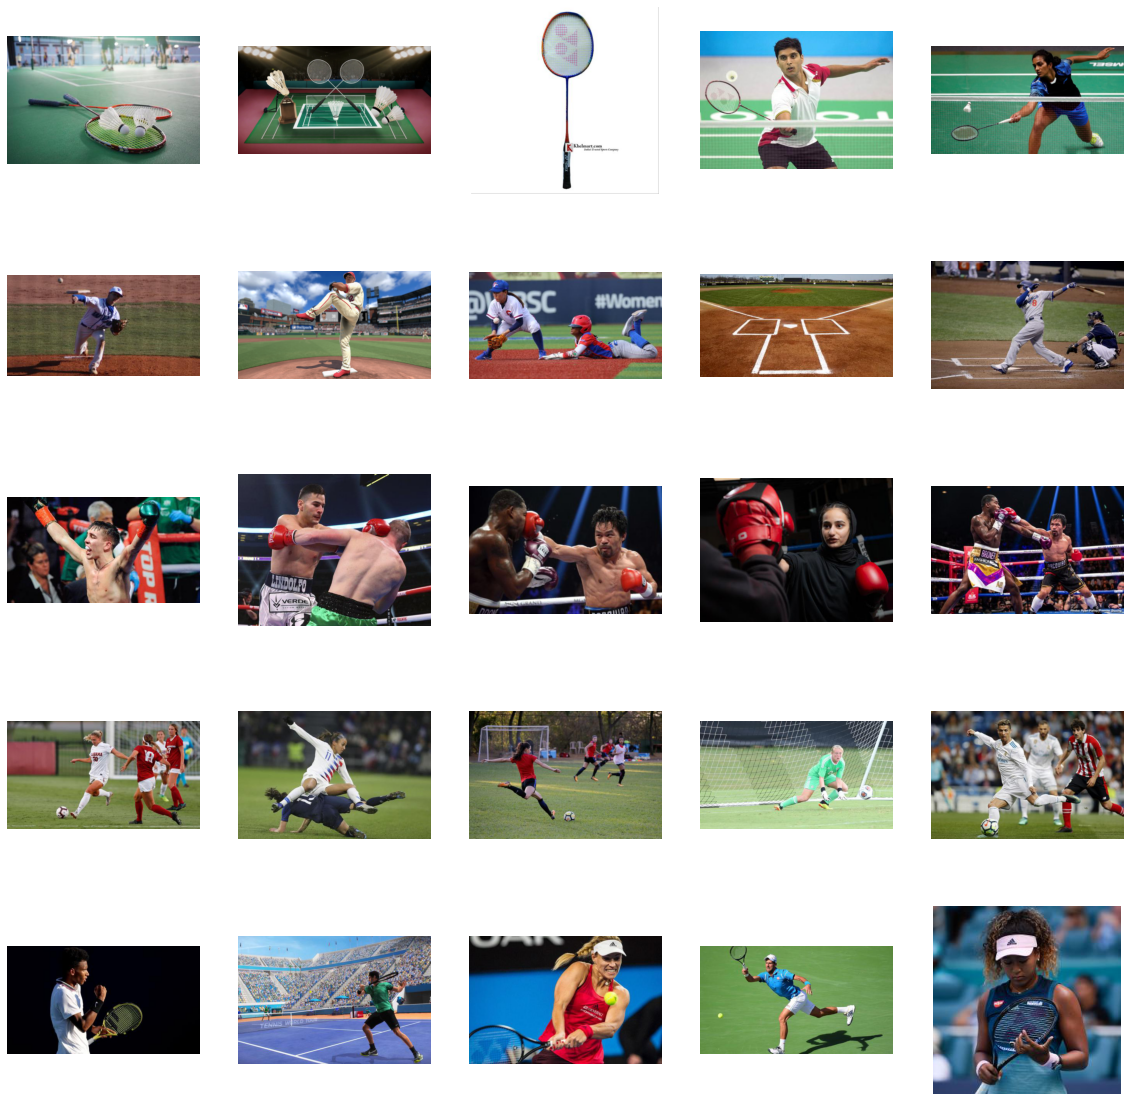

In [4]:
rows = 5
cols = 5

fig = plt.gcf()
fig.set_size_inches(cols * 4, rows * 4)

list_badminton = [os.path.join(train_dir_badminton, fname) for fname in train_badminton_names[0:5]]
list_baseball = [os.path.join(train_dir_baseball, fname) for fname in train_baseball_names[0:5]]
list_boxing = [os.path.join(train_dir_boxing, fname) for fname in train_boxing_names[0:5]]
list_football = [os.path.join(train_dir_football, fname) for fname in train_football_names[0:5]]
list_tennis = [os.path.join(train_dir_tennis, fname) for fname in train_tennis_names[0:5]]

for i, img_path in enumerate(list_badminton+list_baseball+list_boxing+list_football+list_tennis):
    sp = plt.subplot(rows, cols, i + 1)
    sp.axis('Off')
    img = mpimg.imread(img_path)
    plt.imshow(img)

plt.show()

**Definición de la arquitectura**

In [5]:
cnn = Sequential()

cnn.add(Conv2D(filters=16, kernel_size=(3,3), input_shape=(300,300,3)))
cv1 = Activation("relu")
cnn.add(cv1)

cv2 = MaxPooling2D(pool_size=(3,3))
cnn.add(cv2)

cnn.add(Conv2D(32,(3,3)))
cv3 = Activation("relu")
cnn.add(cv3)
cv4 = MaxPooling2D(pool_size=(3,3))
cnn.add(cv4)

cnn.add(Conv2D(64,(3,3)))
cv5 = Activation("relu")
cnn.add(cv5)
cv6 = MaxPooling2D(pool_size=(3,3))
cnn.add(cv6)

cnn.add(Conv2D(64,(3,3)))
cv7 = Activation("relu")
cnn.add(cv7)
cv8 = MaxPooling2D(pool_size=(3,3))
cnn.add(cv8)

cnn.add(Flatten())
cnn.add(Dense(units=512, activation="relu"))
cnn.add(Dense(units=1, activation="sigmoid"))

**Cantidad de parametros generados**

In [6]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 298, 298, 16)      448       
_________________________________________________________________
activation (Activation)      (None, 298, 298, 16)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 99, 99, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 97, 97, 32)        4640      
_________________________________________________________________
activation_1 (Activation)    (None, 97, 97, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 64)        1

**Compilación de la red neuronal**

*   Optimizer: Adam
*   Loss: Binary cross-entropy
*   Metric: Accuracy



In [7]:
cnn.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

**Variaciones de las imagenes**

In [8]:
train_datagen = ImageDataGenerator(
    rescale=1./255.,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

**Pre-procesamiento para Test**

In [9]:
test_datagen = ImageDataGenerator(rescale=1./255.)

**Path de datos de entrenamiento y prueba**

In [10]:
strDataTrain="/content/drive/My Drive/Universidad Galileo/Tercer Trimestre/Statistical Learning II/Proyecto/2-CNN/data_train"
strDataTest="/content/drive/My Drive/Universidad Galileo/Tercer Trimestre/Statistical Learning II/Proyecto/2-CNN/data_test"

**Configuración de imagenes de entrada para entrenamiento**



*   5 clases de deporte
*   Aproximadamente 900 imagenes de cada clase



In [11]:
train_set=train_datagen.flow_from_directory(
    strDataTrain,
    target_size=(300,300),
    batch_size=128,
    class_mode="binary"
)

Found 4498 images belonging to 5 classes.


**Configuración de imagenes de entrada para Test**

In [12]:
test_set=test_datagen.flow_from_directory(
    strDataTest,
    target_size=(300,300),
    batch_size=128,
    class_mode="binary"
)

Found 74 images belonging to 5 classes.


**Entrenamiento**

In [13]:
batch_size = 45
cnn.fit(train_set,
        steps_per_epoch=int(900/batch_size),
        epochs=15,
        validation_data=test_set,
        validation_steps=int(200/batch_size),
        verbose=1)

Epoch 1/15
 9/20 [============>.................] - ETA: 8:36 - loss: -8.5994 - accuracy: 0.1936

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


20/20 [==============================] - 1063s 53s/step - loss: -246.1356 - accuracy: 0.1947 - val_loss: -1757.6035 - val_accuracy: 0.1892
Epoch 2/15
20/20 [==============================] - 510s 25s/step - loss: -40521.0117 - accuracy: 0.1984
Epoch 3/15
20/20 [==============================] - 232s 12s/step - loss: -1259068.2500 - accuracy: 0.2000
Epoch 4/15
20/20 [==============================] - 137s 7s/step - loss: -15892804.0000 - accuracy: 0.2012
Epoch 5/15
20/20 [==============================] - 111s 6s/step - loss: -134237520.0000 - accuracy: 0.2037
Epoch 6/15
20/20 [==============================] - 96s 5s/step - loss: -673716544.0000 - accuracy: 0.1988
Epoch 7/15
20/20 [==============================] - 98s 5s/step - loss: -2744625920.0000 - accuracy: 0.1883
Epoch 8/15
20/20 [==============================] - 95s 5s/step - loss: -8838588416.0000 - accuracy: 0.1980
Epoch 9/15
20/20 [==============================] - 96s 5s/step - loss: -24284848128.0000 - accuracy: 0.2004
Ep

**Experimento**

In [56]:
img = image.load_img("/content/drive/My Drive/Universidad Galileo/Tercer Trimestre/Statistical Learning II/Proyecto/2-CNN/data_train/football/00000030.jpg", target_size=(300,300))

In [57]:
img_array = image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)

In [63]:
predictions = cnn.predict(img_array)
score = predictions[0]
print(
    "Esta imagen tiene %.2f de pertener a fútbol y %.2f de pertenecer a cualquier otro deporte."
    % (100 * score, 100 * (1 - score))
)

Esta imagen tiene 100.00 de pertener a fútbol y 0.00 de pertenecer a cualquier otro deporte.


**Gráfica de filtros y activaciones**

Se tomará de base una de las imagenes de fútbol y sobre esta se visualizarán las distintas capas de la red neuronal.

(1, 300, 300, 3)


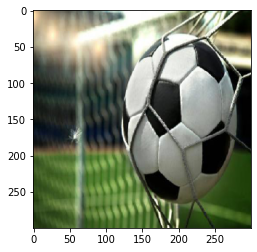

In [17]:
img_path = '/content/drive/My Drive/Universidad Galileo/Tercer Trimestre/Statistical Learning II/Proyecto/2-CNN/data_train/football/00000020.jpg'

img = image.load_img(img_path, target_size=(300, 300))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.
print(img_tensor.shape)

plt.imshow(img_tensor[0])
plt.show()

**Visualizando una capa**

(1, 298, 298, 16)


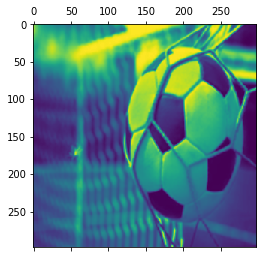

In [44]:
layer_outputs = [layer.output for layer in cnn.layers[:12]]
activation_model = models.Model(inputs=cnn.input, outputs=layer_outputs)
activations = activation_model.predict(img_tensor)
first_layer_activation = activations[0]
print(first_layer_activation.shape)

plt.matshow(first_layer_activation[0, :, :, 3], cmap='viridis')
plt.show()

**Visualización de todos los canales en una capa de activación**

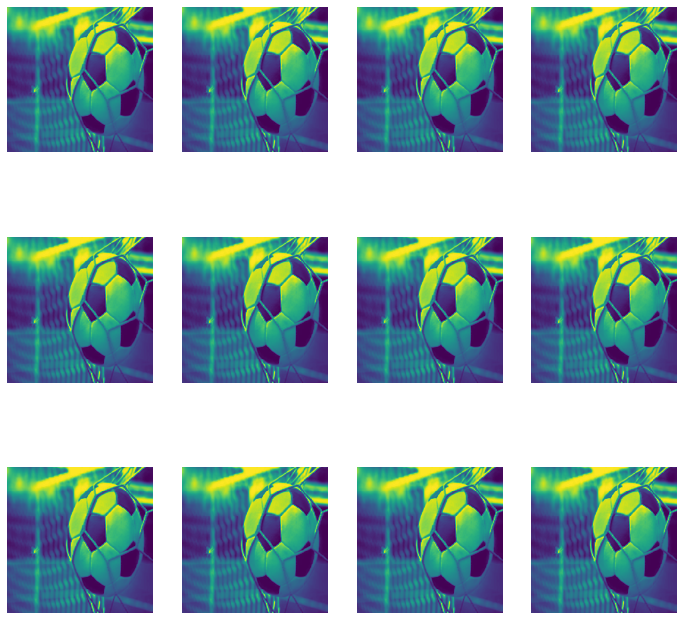

In [47]:
fig, axes = plt.subplots(3, 4, figsize=(12,12))
for i in range(12):
    row = i//4
    column = i%4
    ax = axes[row, column]
    ax.axis('Off')
    first_layer_activation = activations[0]
    ax.matshow(first_layer_activation[0, :, :, 3], cmap='viridis')

**Visualización de todas las capas de activación**

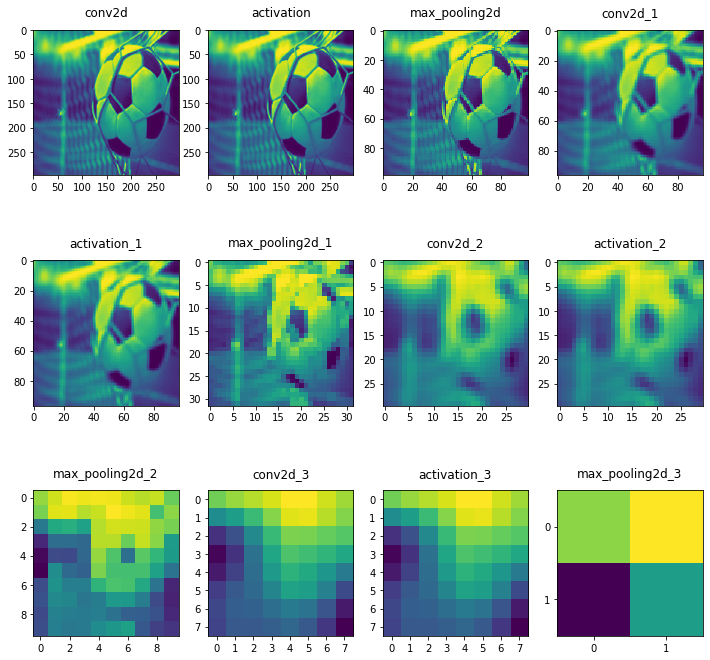

In [49]:
fig, axes = plt.subplots(3,4, figsize=(12,12))

layer_names = []
for layer in cnn.layers[:12]:
    layer_names.append(layer.name)

for i in range(12):
    row = i//4
    column = i%4
    ax = axes[row, column]
    cur_layer = activations[i]
    ax.matshow(cur_layer[0, :, :, 3], cmap='viridis')
    ax.xaxis.set_ticks_position('bottom')
    ax.set_title(layer_names[i])

## **Ensayo**
#### **Densely Connected Convolutional Networks**

**Abstract**

Recientes investigaciones han demostrado que las redes convolucionales pueden llegar a ser más precisas y eficientes de entrenar si poseen conexiones más cortas entre capas cercanas a la salida. Este artículo introduce el concepto de Dense Convolutional Network (DenseNet) y se define como la capa que conecta con todas las demás de forma anticipada. Las DenseNet poseen ventajas importantes: resuelven el problema de vanishing-gradient, fortalecen la propagación de características, fomentan la reutilización de características y reducen sustancialmente el número de parámetros.

**Introducción**

Las redes neuronales convolucionales (CNN) han llegado a ser el enfoque de Machine Learning que predomina en el reconocimiento visual de objetos. Originalmente se introdujeron aproximadamente hace veinte años, las mejoras computacionales han permitido que hasta hace poco se vea todo el potencial. A medida que las redes convolucionales se vuelven más profundas, surgen nuevos problemas y uno tiene que ver con el gradiente que puede desaparecer al atravesar muchas capas. Existen diferentes enfoques que varían la topología de la red y el procedimiento de entrenamiento con el objetivo de crear rutas cortas, pero en este artículo la idea es exponer una arquitectura que ofrece una arquitectura de conectividad simple, que se logrará conectando todas las capas directamente entre sí. Para preservar la naturaleza de retroalimentación, cada capa obtiene entradas adicionales de todas las capas anteriores y pasa sus propios Feature Map a todas las capas posteriores. Debido a su patrón de conectividad Denso, la idea que se expone hace referencia a la Red Convolucional Densa (DenseNet).

Una característica particular del enfoque DenseNet es que requiere menos parámetros que las redes convolucionales tradicionales, debido a que no hay que aprender mapas de características redundantes. Por ejemplo, las arquitecturas feed-forward pueden verse como aquellas que transmiten su estado de una capa a otra. Cada capa lee el estado de su capa previa y escribe en la capa siguiente. Las capas densas son bastante estrechas, porque agregan solo un pequeño conjunto de mapas de características al conocimiento de la red y mantiene el resto de mapas sin cambios, por último el clasificador toma una decisión en términos de los mapas de características de la red.

**Investigaciones relacionadas**

El incremento en el número de capas en las redes neuronales modernas aumenta la diferencia entre arquitecturas y motiva la investigación de diferentes patrones de conectividad y la revisión de antiguas ideas de investigación. Recientemente se han encontrado redes en cascada totalmente conectadas para entrenar Batch Gradient Descent. Aunque resulta bastante útil en conjuntos de datos pequeños, este tipo de redes solo se adapta con unos cuantos cientos de parámetros.

**DenseNets**

Con la intenci{on de mejorar el flujo de información entre las distintas capas, se propone un patrón de conectividad diferente, donde las conexiones son directas desde cualquier lugar a todas las capas posteriores. En consecuencia la capa en cuestión recibirá todos los Feature Maps de todas las capas previas como entrada.

*   Función compuesta: Se refiere a la composición de tres operaciones, normalización por lotes, unidad de activación y una convolución.
*   Agrupación en capas: Para facilitar el muestreo descendente en la arquitectura, se divide la red en multiples bloques densamente conectados.
*   Tasa de crecimiento: Cada función poseera k mapas de características y este vendrá siendo un hiperparametro como la tasa de crecimiento de la red.
*   Botleneck layers: Aunque cada capa solo produce k mapas de características, normalmente posee muchas más entradas, en consecuencia, introducir una capa de cuello de botella en cada convolución para reducir el número de mapas de características mejoraría la eficiencia computacional.
*   Compresión: Para mejorar aún más la compresión del modelo se puede reducir la cantidad de mapas de características en las capas de transición.

**Conclusión**

Densenet requiere sustancialmente menos parámetros y menos cálculos para lograr rendimiento de vanguardia. Esto debido a que se adoptan configuraciones de hiperparámetros optimizados para redes residuales. Si bien sigue una regla de conectividad simple, se integra perfectamente a las propiedades de supervisión profunda y profundidad diversificada.

### **Análisis y como se relaciona con el Dataset propuesto**
Definitivamente si se habla de datos con distribución espacial, la red convolucional posee la arquitectura adecuada, pero asociado a la propuesta de DenseNet, se lograría introducir conexiones directas entre dos capas cualesquiera con el mismo tamaño de características, logrando que se escale de forma natural cientos de capas sin verse afectada la optimización.

Por otro lado DenseNet tiene a producir una mejora constante en la precisión con un numero creciente de parametros sin ningún signo de degradación del rendimiento o sobreajuste.


## **Análisis de Segundo Paper (Puntos Extra)**

#### **Faster R-CNN: Toward Real-Time Object Detection with Region Proposal Networks**

**Abstract**

Las redes de detección de objetos de última generación dependen de algoritmos que utilizan la región o el entorno para formular hipótesis sobre la ubicación del objeto.

Los avances en investigación han permitido que se reduza el tiempo de ejecución de estas redes de detección, exponiendo el calculo de la región como un cuello de botella.

Una Region Proposal Network(RPN) es una red completamente convolucional que predice simultáneamente los límites de los objetos y las puntuaciones de objetividad en cada posición.

**Introducción**

Recientemente se ha notado un fenomeno en la implementación de RPN y esto se debe a el éxito de los métodos de propuesta de región y las redes neuronales basadas en regiones. También hay que mencionar que computacionalmente las RPN's eran bastante exigentes, pero su costo se ha reducido considerablemente gracias a las convoluciones compartidas, los últimos indicadores arrojan tasas casi en tiempo real, haciendo uso de redes muy profundas.

Ahora la propuesta gira en torno a los cuellos de botella computacionales de los sistemas de detección de última generación. Actulamente las RPN ofrecen la mejor compesnación entre la calidad y la velocidad de detección a 0.2 segundos por imagen.

**Region Proposal Networks**

Una red de este tipo toma una imagen de entrada y como salida una propuesta de objetos, cada uno con cierta puntuación. Para generar una red neuronal po región, basta con deslizar una pequeña red sobre la salida del mapa de características de la última capa convolucional compartida. Esta pequeña red toma como entrada una ventana espacial n x n del mapa de características convolucional de entrada.

Cada ventana deslizante se asigna a una característica de menor dimensión, esta característica alimenta a dos capas más, que se encuentran completamente conectadas (una capa de regresión y otra de clasificación).

Se debe tomar en cuenta que la mini-red opera en forma de ventana deslizante y que las capas completamente conectadas son compartidas en todas las ubicaciones espaciales.


